# Limpieza y Transformación Dataset

In [10]:
import pandas as pd

dataframe = pd.read_csv('data\MEC02.20250618152207.csv')

dataframe.info()
dataframe.describe()
dataframe.head(15)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   STATISTIC                120 non-null    object
 1   Statistic Label          120 non-null    object
 2   TLIST(Q1)                120 non-null    object
 3   Quarter                  120 non-null    object
 4   C03907V04659             120 non-null    object
 5   Electricity Consumption  120 non-null    object
 6   UNIT                     120 non-null    object
 7   VALUE                    120 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 7.6+ KB


,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C03907V04659,Electricity Consumption,UNIT,VALUE
0,MEC02,Gigawatt hours,2015Q1,2015Q1,-,All metered electricity consumption,GWh,6565
1,MEC02,Gigawatt hours,2015Q1,2015Q1,10,Data centres,GWh,290
2,MEC02,Gigawatt hours,2015Q1,2015Q1,20,Customers other than data centres,GWh,6275
3,MEC02,Gigawatt hours,2015Q2,2015Q2,-,All metered electricity consumption,GWh,6086
4,MEC02,Gigawatt hours,2015Q2,2015Q2,10,Data centres,GWh,303
5,MEC02,Gigawatt hours,2015Q2,2015Q2,20,Customers other than data centres,GWh,5783
6,MEC02,Gigawatt hours,2015Q3,2015Q3,-,All metered electricity consumption,GWh,5783
7,MEC02,Gigawatt hours,2015Q3,2015Q3,10,Data centres,GWh,316
8,MEC02,Gigawatt hours,2015Q3,2015Q3,20,Customers other than data centres,GWh,5468
9,MEC02,Gigawatt hours,2015Q4,2015Q4,-,All metered electricity consumption,GWh,6165


Tras explorar el dataset y analizar cada columna saco la siguiente informacion. 

Quarter	- Fecha en formato tipo "Q1 2020" – clave temporal para análisis.  
Electricity Consumption	-	Es redundante con VALUE, pero puede servir para contexto.
VALUE	-	Dato principal: consumo energético (en GWh).
UNIT - Siempre es "GWh", pero puede servir para etiquetas.
STATISTIC, Statistic Label, TLIST(Q1), C03907V04659	-  Meta-información o redundante.

Voy a limpiar el dataset

In [2]:
dataframe= dataframe[['Quarter','UNIT','VALUE']]

dataframe.columns = ['Fecha', 'unidad', 'valor_en_gwh']

print(dataframe.dtypes)

Fecha           object
unidad          object
valor_en_gwh     int64
dtype: object


Para evitar confusion voy a cambiar la fecha

In [3]:
# Convertir "Q1 2020" a fechas
dataframe['Fecha'] = pd.PeriodIndex(dataframe['Fecha'], freq='Q').to_timestamp()

# Confirmar resultado
print(dataframe.head())


       Fecha unidad  valor_en_gwh
0 2015-01-01    GWh          6565
1 2015-01-01    GWh           290
2 2015-01-01    GWh          6275
3 2015-04-01    GWh          6086
4 2015-04-01    GWh           303


Guardo el dataset limpio

In [4]:
dataframe.to_csv("outputs/dataset_limpio.csv", index=False)


# Visualización del Consumo Eléctrico

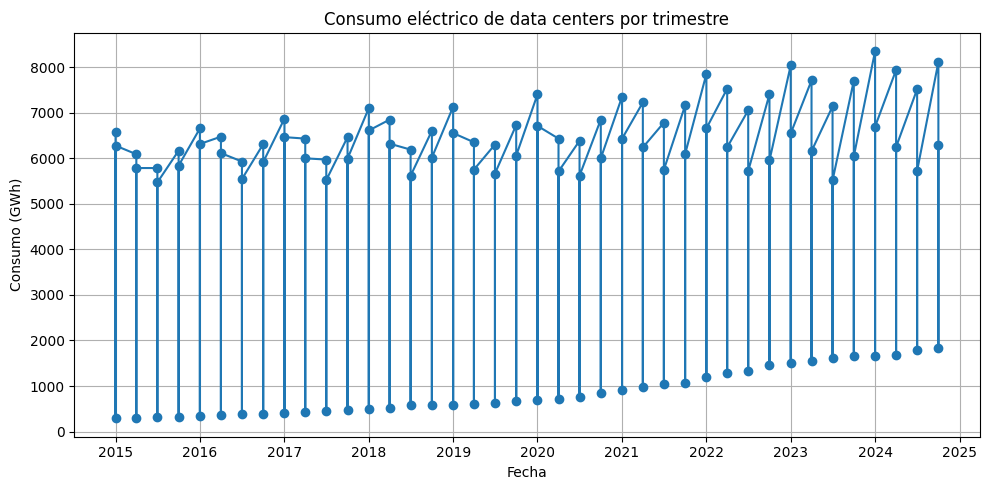

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dataframe['Fecha'], dataframe['valor_en_gwh'], marker='o', linestyle='-')
plt.title('Consumo eléctrico de data centers por trimestre')
plt.xlabel('Fecha')
plt.ylabel('Consumo (GWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


Con este gráfico puedo ver como ha avanzado el consumo a los alrgos de los ultimos 10 años

# Creación de nuevas variables

In [6]:
dataframe['variacion'] = dataframe['valor_en_gwh'].pct_change() * 100
dataframe['media_cuatrimestre'] = dataframe['valor_en_gwh'].rolling(window=4).mean()
dataframe['nivel_consumo'] = pd.qcut(dataframe['valor_en_gwh'], q=3, labels=['Bajo', 'Medio', 'Alto'])



He creado dos nuevas columnas, una para valorar la variacion del consumo y otra para sacar una media cuadrimestral del consumo energético

In [7]:
dataframe.to_csv("outputs/dataset_enriquezido.csv", index=False)
